In [1]:
#Nikhil Kagalwala
#Nick Project

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import date
from calendar import monthrange
import math

%matplotlib inline

In [3]:
df = pd.read_csv("September 2021 Count Report.csv")

In [4]:
days_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [5]:
#get month and year from csv
date_arr = (df["Date"][0]).split("/")
year = int(date_arr[2][:4])
month = int(date_arr[0])
#get (first day of month, num of days in month)
monthData = monthrange(year,month)
print(monthData)

#create 2D array for each day of the week (starting with monday), initialize it
# [i,j] = day of the week -> all dates of month that are on this day
# [0,0] = sep_6 (first monday of the month)

daysOfWeekData = [None, None, None, None, None, None, None]
for i in range(1, monthData[1] + 1):
    strDate = str(month) + "/" + str(i) + "/" + str(year) + " 0:00"
    data = df[df["Date"] == strDate]
    index = ((i + monthData[0]) % 7) - 1
    #define each first day of day of week
    if (i < 8):
        if (index == -1):
            index = 6
        daysOfWeekData[index] = [data]
    else:
        if (index == -1):
            index = 6
        daysOfWeekData[index].extend([data])
        
pd.DataFrame(daysOfWeekData[0][0])

(2, 30)


,Facility,Location,Date,6:00 AM,7:00 AM,8:00 AM,9:00 AM,10:00 AM,11:00 AM,12:00 PM,...,4:00 PM,5:00 PM,6:00 PM,7:00 PM,8:00 PM,9:00 PM,10:00 PM,11:00 PM,Total Count,Status
80,Nicholas Recreation Center,Nick Raquetball Court 1,9/6/2021 0:00,0,NaN,NaN,0,0,2,0,...,1,2,0,NaN,NaN,NaN,NaN,NaN,9.000000,Active
81,Nicholas Recreation Center,Nick Raquetball Court 2,9/6/2021 0:00,0,NaN,NaN,0,0,0,2,...,4,2,0,NaN,NaN,NaN,NaN,NaN,18.000000,Active
82,Nicholas Recreation Center,Balance (level 3),9/6/2021 0:00,0,NaN,1,1,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,2.000000,Active
83,Nicholas Recreation Center,Spark (level 3),9/6/2021 0:00,C,C,C,C,C,C,C,...,2,2,0,NaN,NaN,NaN,NaN,NaN,6.000000,Active
84,Nicholas Recreation Center,Revolution (Spin LL),9/6/2021 0:00,0,NaN,NaN,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,Active
85,Nicholas Recreation Center,Nick Level 3 Fitness,9/6/2021 0:00,26.5,31,63,83,103,102,114,...,90,85,90,70,71,NaN,NaN,25,1248.500000,Active
86,Nicholas Recreation Center,Momentum (level 2),9/6/2021 0:00,0,NaN,NaN,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.000000,Active
87,Nicholas Recreation Center,Nick Level 1 Fitness,9/6/2021 0:00,4,9.66666666666667,28,48,60,69,59,...,50,45,40,28.5,NaN,NaN,NaN,7,613.166667,Active
88,Nicholas Recreation Center,Nick Power House,9/6/2021 0:00,16,25,43,70,65,64,69,...,60,79,67,37,NaN,NaN,16,NaN,830.000000,Active
89,Nicholas Recreation Center,Nick Level 2 Fitness,9/6/2021 0:00,2,10.5,22,37,55,57,46,...,32,29,22,12.5,NaN,NaN,NaN,1,426.000000,Active


In [15]:
class Room:
    def __init__(self, name, max_capacity):
        self.name = name
        self.max_capacity = max_capacity
    
    def display_graph(self, day):
        times = ["6:00 AM", "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM",
         "12:00 PM", "1:00 PM", "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM",
         "6:00 PM", "7:00 PM", "8:00 PM", "9:00 PM", "10:00 PM", "11:00 PM"]
        counts = [0.0] * 18
        sums = [0.0] * 18
        avgs = [0.0] * 18
        day_data = daysOfWeekData[days_week.index(day)]        

        for days in day_data:
            curr_ind = -1
            curr_ind = days.index[days["Location"] == self.name].tolist()[0]
            if (curr_ind != -1):                
                for i in range(len(times)):
                    if (str(df.iloc[curr_ind][times[i]]) != "nan"):
                        sums[i] += float(df.iloc[curr_ind][times[i]])
                        counts[i] += 1
        
        
        for i in range(len(counts)):
            # we have to stop this calculation if counts[i] = 0 and somehow show that there is not enough data for this graph
            if (counts[i] != 0.0):
                avgs[i] = math.ceil(sums[i] / counts[i])
            else:
                avgs[i] = 0
            
        plt.bar(times, avgs, color="#0479a8")
        plt.ylabel('Count', fontsize=14)
        plt.xlabel('Time', fontsize=14)
        plt.xticks(rotation=90)
        title = self.name + "\n" + day + " Usage"
        plt.title(title, fontsize=14)
        #plt.ylim(0, self.max_capacity)
        plt.show()


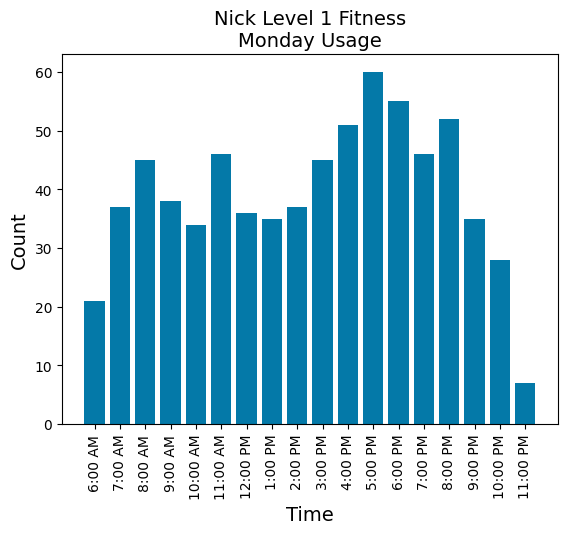

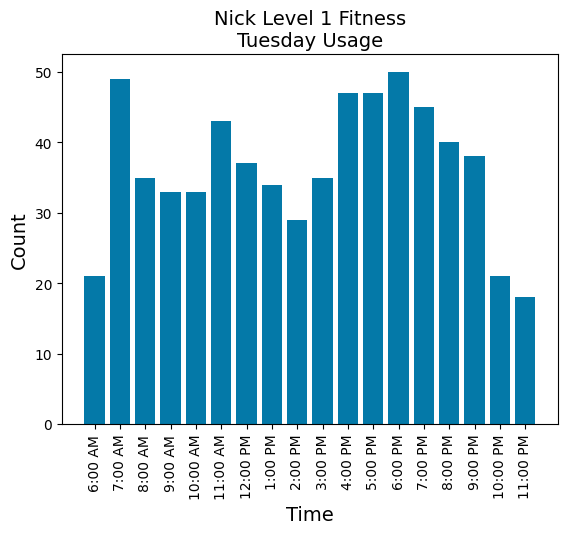

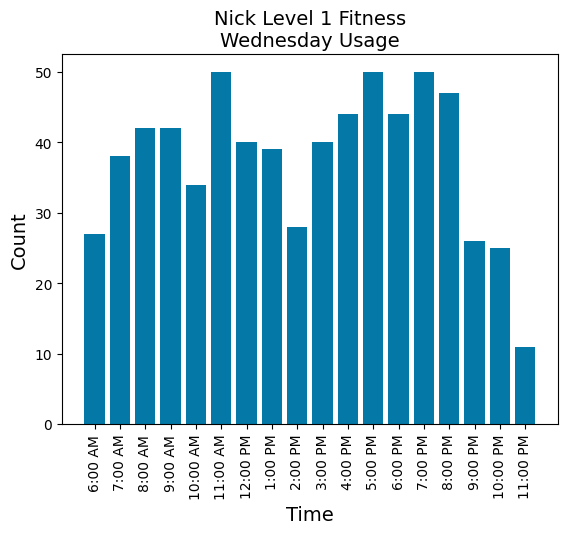

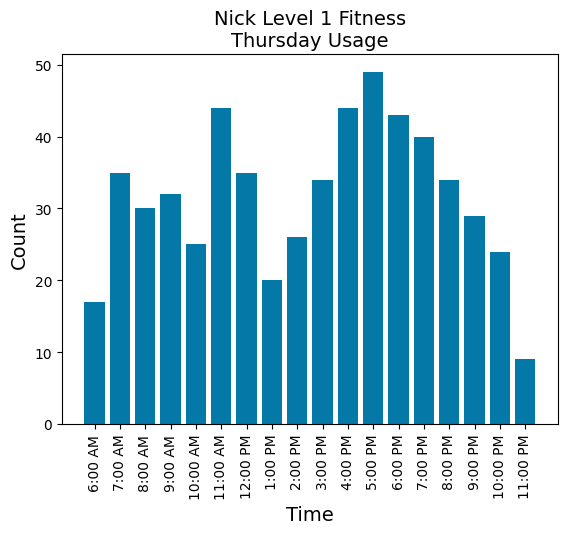

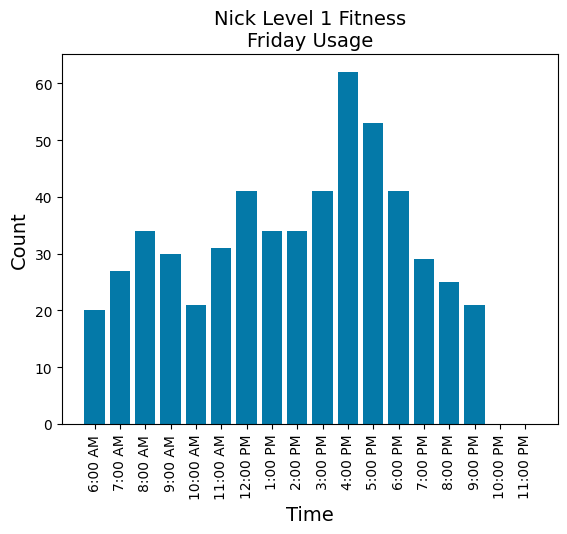

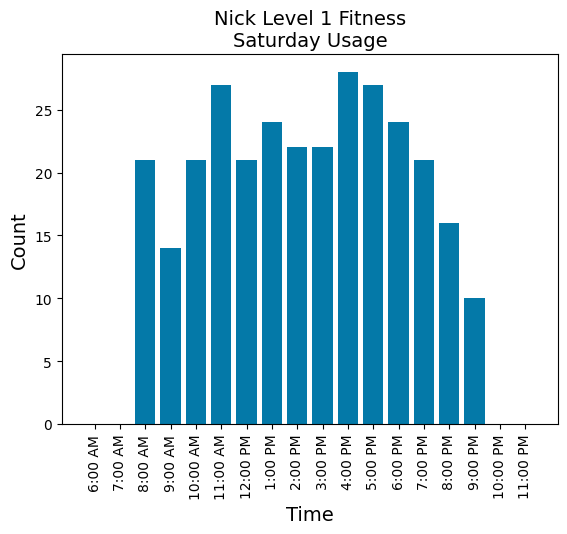

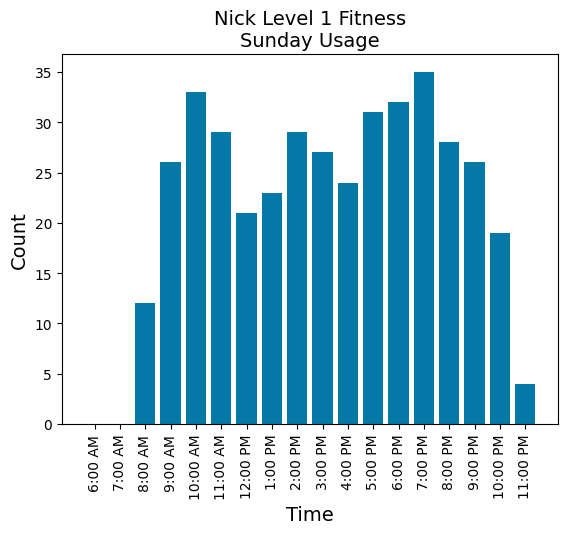

In [16]:
lvl_1_fitness = Room("Nick Level 1 Fitness", 100)

for day in days_week:
    lvl_1_fitness.display_graph(day)